In [1]:
# https://www.kaggle.com/code/prashant111/catboost-classifier-in-python/notebook

In [38]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
depev = pd.read_csv('depev_final.csv')
depev.drop(depev.columns[depev.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
depev.head()

,URBRRL,RATCAT_A,INCGRP_A,INCTCFLG_A,FAMINCTC_A,IMPINCFLG_A,PPSU,PSTRAT,HISPALLP_A,RACEALLP_A,...,ANGEV_A,CHDEV_A,CHLEV_A,HYPEV_A,PHSTAT_A,AVAIL_A,INTV_QRT,WTFA_A,WTIA_A,POVRATTC_A
0,4,9,3,0,60000,2,2,122,3,2,...,2,2,1,2,3,1,1,13177.008,7601.336,2.96
1,4,9,3,0,50000,0,2,122,2,1,...,2,2,2,2,1,1,1,6140.552,3344.434,2.97
2,4,12,3,0,65000,1,2,122,2,1,...,2,2,1,1,3,1,1,9191.061,6949.498,4.28
3,4,14,5,0,120000,0,2,122,1,8,...,2,2,2,1,2,1,1,7900.035,6446.327,7.13
4,1,4,1,0,30000,0,2,115,2,1,...,1,1,1,1,4,1,1,10875.772,8646.586,1.13


In [4]:
X = depev.drop(['DEPEV_A'], axis=1)
y = depev['DEPEV_A']

In [7]:
X = X.astype(int)

In [8]:
cat_features = list(range(0, X.shape[1]))
print(cat_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)

clf.fit(X_train, y_train, 
        cat_features=cat_features, 
        eval_set=(X_val, y_val), 
        verbose=False
)

print('CatBoost model is fitted: ' + str(clf.is_fitted()))
print('CatBoost model parameters:')
print(clf.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 5, 'learning_rate': 0.1}


In [11]:
clf = CatBoostClassifier(
    iterations=10,
#     verbose=5,
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
)

Learning rate set to 0.5
0:	learn: 0.5092237	test: 0.5045855	best: 0.5045855 (0)	total: 256ms	remaining: 2.31s
1:	learn: 0.3664556	test: 0.3623770	best: 0.3623770 (1)	total: 407ms	remaining: 1.63s
2:	learn: 0.2937322	test: 0.2881038	best: 0.2881038 (2)	total: 596ms	remaining: 1.39s
3:	learn: 0.2561126	test: 0.2519860	best: 0.2519860 (3)	total: 829ms	remaining: 1.24s
4:	learn: 0.2361270	test: 0.2318381	best: 0.2318381 (4)	total: 1.07s	remaining: 1.07s
5:	learn: 0.2220685	test: 0.2183750	best: 0.2183750 (5)	total: 1.34s	remaining: 894ms
6:	learn: 0.2137577	test: 0.2097764	best: 0.2097764 (6)	total: 1.59s	remaining: 682ms
7:	learn: 0.2094930	test: 0.2061219	best: 0.2061219 (7)	total: 1.82s	remaining: 455ms
8:	learn: 0.2059853	test: 0.2042084	best: 0.2042084 (8)	total: 2.06s	remaining: 229ms
9:	learn: 0.2038280	test: 0.2024640	best: 0.2024640 (9)	total: 2.29s	remaining: 0us

bestTest = 0.2024640119
bestIteration = 9



In [13]:
print(clf.predict_proba(X_val))

[[0.06294582 0.93401477 0.00303941]
 [0.86099893 0.13101011 0.00799096]
 [0.02700404 0.97126074 0.00173521]
 ...
 [0.02768094 0.97053732 0.00178174]
 [0.01440452 0.98382604 0.00176943]
 [0.01613381 0.98192429 0.0019419 ]]


In [14]:
print(clf.predict(X_val))

[[2]
 [1]
 [2]
 ...
 [2]
 [2]
 [2]]


In [43]:
clf.score(X_train, y_train)

0.9288144874251966

In [45]:
clf.score(X_val, y_val)

0.9292866082603254

In [34]:
y_predict= clf.predict(X_val)
#RMSE
Rmse_test = math.sqrt(mean_squared_error(y_val,y_predict))
#R2 Score
r2_test = r2_score(y_val,y_predict)
# Adjusted R2 Score
n= X_train.shape[0] # total no of datapoints
p= X_train.shape[1] # total no of independent features
adj_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
#print results
print("Evaluation on train data")
print("RMSE: {:.2f}".format(Rmse_test))
print("R2: {:.2f}".format(r2_test))
print("Adjusted R2: {:.2f}".format(adj_r2_test))

Evaluation on train data
RMSE: 0.37
R2: 0.32
Adjusted R2: 0.31


In [15]:
clf = CatBoostClassifier(
    iterations=50,
    random_seed=42,
    learning_rate=0.5,
    custom_loss=['AUC', 'Accuracy']
)

clf.fit(
    X_train, y_train,
    cat_features=cat_features,
    eval_set=(X_val, y_val),
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

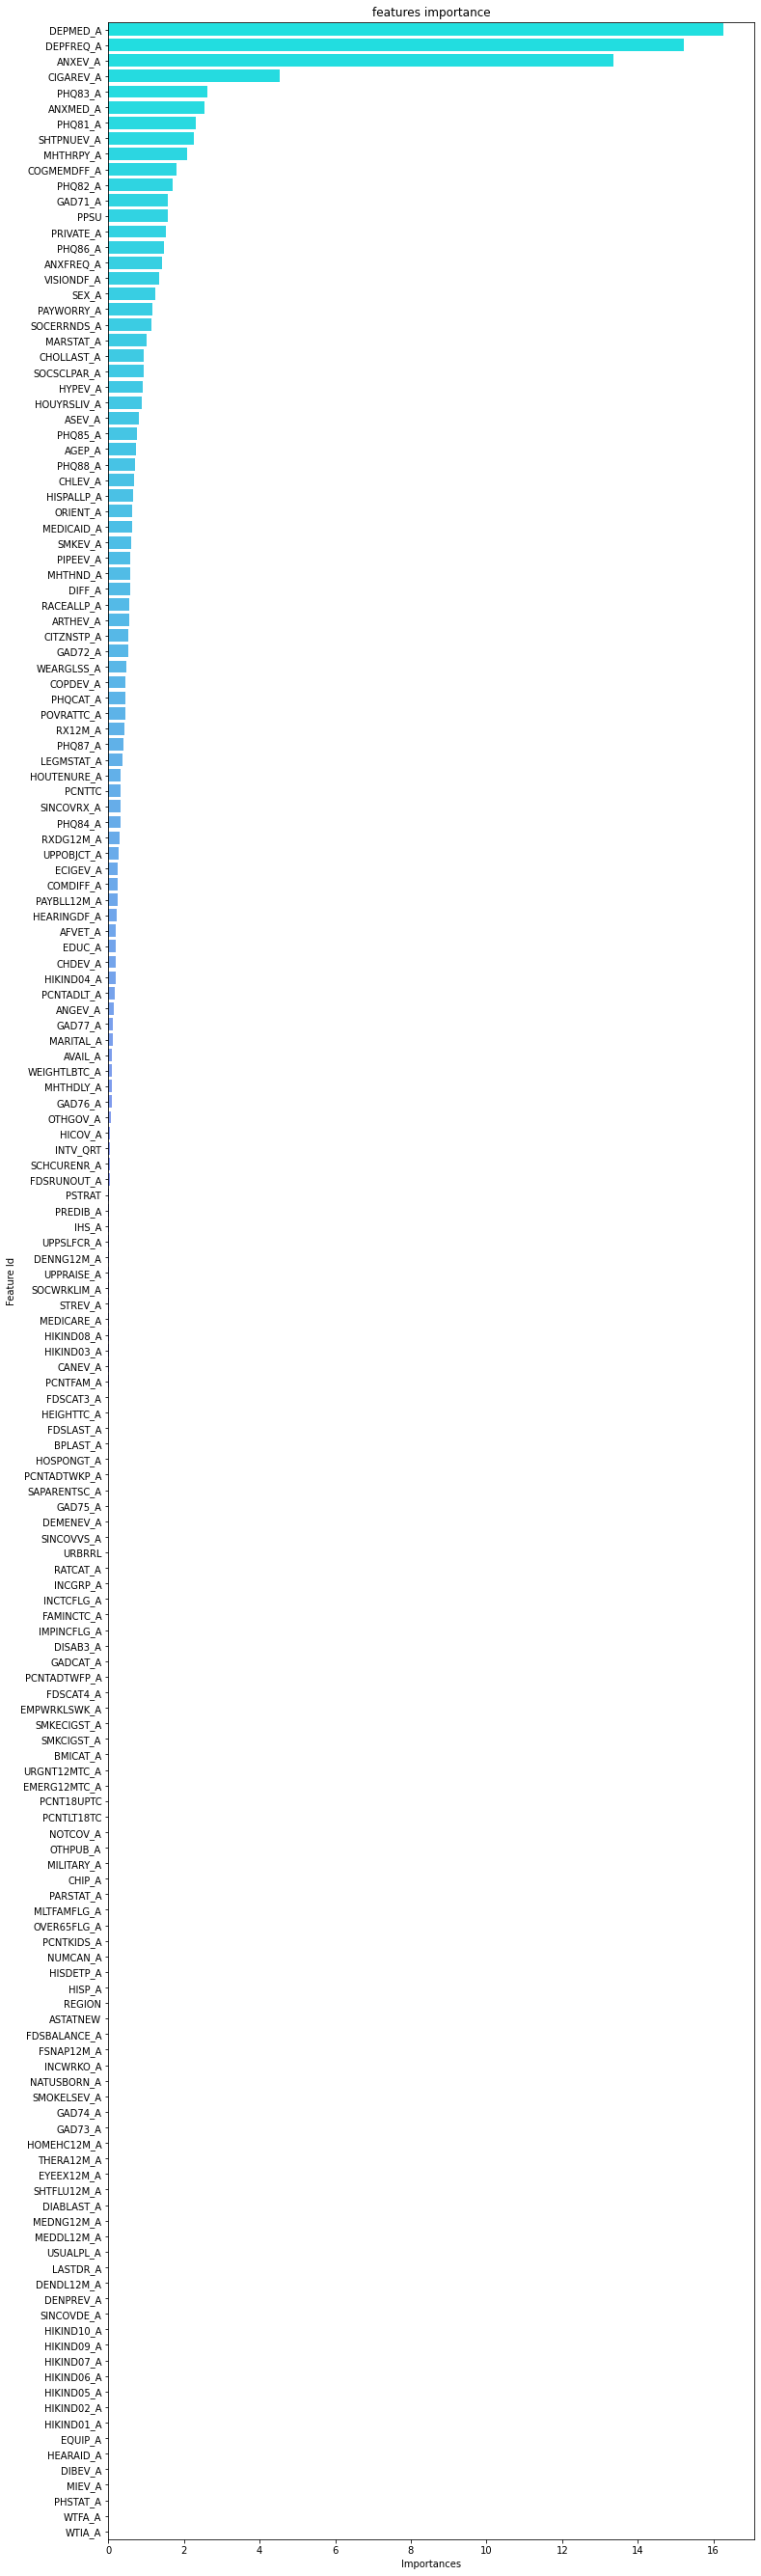

In [48]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(clf.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 48));
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool");
plt.title('features importance');